* regression, classification을 위한 많은 통계적 기법 중,
* Linear Regression, Logistic Regression 등은 기본적인 모델 형태를 갖춘 형태에서   
데이터에 따라 모델의 파라미터를 조정하는 방식으로 모델을 형성하였음
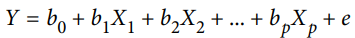

* 반면에 KNN, decision tree, 딥러닝 모델 등은 전체 모델 형태로 인한 한계가 적고, 데이터를 중심으로 유동적임


* 데이터를 중심으로 한다는 점에서,   
기존 통계에서는 데이터가 어떤 분포(정규 분포, t-분포 등)를 가지고 있는지 추론하는 과정을 전제한 후에 모수 추정을 수행했으나, bootstrap 기법은 분포 추론없이 바로 모수 추정을 진행할 수 있는 것과 유사   

## K-Nearest Neighbors
* 다른 값과의 유사도를 비교하여 classification / prediction 수행
* (classification) 주변 값과 비교하여, 주변 값들의 클래스가 차지하는 비율을 바탕으로 class 분류
* (prediction) 주변 값들이 공유하는 평균 값으로 예측(KNN regression)
* 학습데이터보다 변수의 개수가 많은 경우 성능이 크게 떨어짐   
'특성 선택' 및 '차원 축소 기법'을 사용하여 변수의 개수를 줄이거나 다른 알고리즘을 사용해야 함
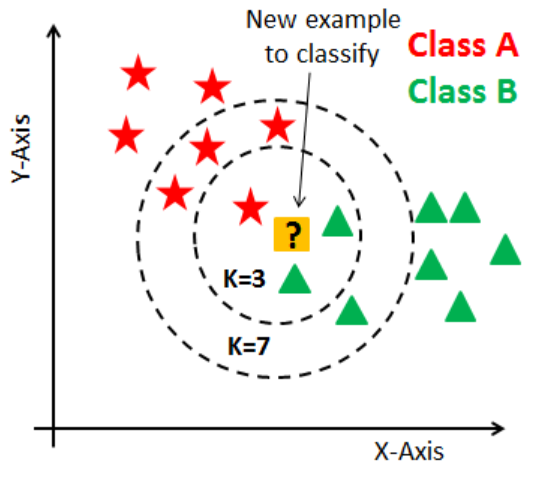

### 유사도(similarity, nearness) 측정
* 두 instance vector 간 거리를 distance metric을 이용하여 계산

* euclidean distance: 두 벡터 사이의 직선 거리
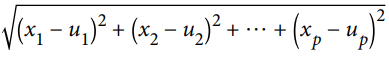
* manhattan distance: 두 벡터의 각 요소간 길이의 합
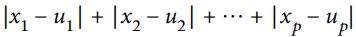

### 스케일러 사용
* 표준화(standardization): 변수의 값이 가지는 스케일 차이가 모델 학습에 과도하게 영향을 미치는 것을 막기 위해 사용   
일반적으로 학습 전에 데이터 표준화 수행
* 값의 크기는 변형하되 변수의 값 차이가 가졌던 거리 특성은 남아있도록 함
* 이 중 z-score 형태의 변환은 정규화(normalization)라고도 부름   
* 변수(attribute) 마다 다른 스케일러를 적용하여 변수의 영향력을 임의로 조절할 수 있음   
StandardScaler, MinMaxScaler 등을 변수마다 다르게 적용하는 식
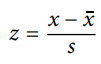

### K 고르기
* KNN의 성능을 결정하는데 가장 중요
* 1-nearest neighborhood classifier: k=1로 설정하여, 현재 데이터와 가장 유사한 하나를 찾음   
* 일반적으로 k가 너무 작으면 데이터의 noise 영향을 많이 받아 overfitting될 수 있음   
overfitting 되는 경우 새로운 데이터에 대해서는 성능이 떨어짐
* 반면 너무 크면 KNN이 가지는 지역성이라는 이점을 잃음
* 절대적인 최선의 k 값은 정해져있지 않으며, 데이터의 성질에 영향을 많이 받음   
예를 들어 noise가 거의 없는 데이터에서는 k가 작을 수록 좋음

In [ ]:
# 데이터셋 불러오기

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
mobile_price = pd.read_csv('./mobile_price/train.csv')
print(mobile_price.shape)
mobile_price.head()

(2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
# 데이터셋 전처리
columns = mobile_price.columns

X = mobile_price[columns[:-1]]
y = mobile_price[columns[-1]]

sc = StandardScaler()
X = sc.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [7]:
print(len(x_train), len(x_test))

1800 200


In [12]:
# 모델 학습

knn_model = KNeighborsClassifier(n_neighbors=11,
                                metric='manhattan').fit(x_train, y_train)
print(knn_model.score(x_train, y_train))
print(knn_model.score(x_test, y_test))

0.7166666666666667
0.62


In [14]:
print(knn_model.predict_proba(x_test)[0])
print(knn_model.predict(x_test)[0])

[0.09090909 0.09090909 0.36363636 0.45454545]
3


In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
y_pred = knn_model.predict(x_test)

In [17]:
confusion_matrix(y_test, y_pred)

array([[34,  8,  0,  0],
       [18, 23,  7,  2],
       [ 3, 11, 27,  6],
       [ 0,  2, 19, 40]], dtype=int64)

In [ ]:
# class 0에 대한 confusion matrix
[[34, 8],
[21, 1.. ]]

In [ ]:
# knn regressor

In [18]:
marketing = pd.read_csv('Marketing_data.csv')
X_market = marketing[['youtube', 'facebook', 'newspaper']]
y_market = marketing['sales']

X_market = sc.fit_transform(X_market)

x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(X_market, y_market,
                                                            test_size = 0.1, random_state = 0)

In [21]:
from sklearn.neighbors import KNeighborsRegressor

knn_model_r = KNeighborsRegressor(n_neighbors = 5)
knn_model_r.fit(x_train_m, y_train_m)

KNeighborsRegressor()

In [22]:
print(knn_model_r.score(x_train_m, y_train_m))
print(knn_model_r.score(x_test_m, y_test_m))

0.9549425568366431
0.9377531887755102


## Tree Models
* classification / regrssion
* decision tree, tree, CART(Classification and Regression Tree)라고도 불림
* 일련의 "if-then-else"가 계층적으로 구조되어 있음(hierarchical tree)   
이 과정에서 변수간 interaction이 반영되며 simple dicision tree에서는 사용자도 이를 확인할 수 있음
* root: 첫번째 노드, leaf: 마지막 노드. 클래스가 분류되는 지점
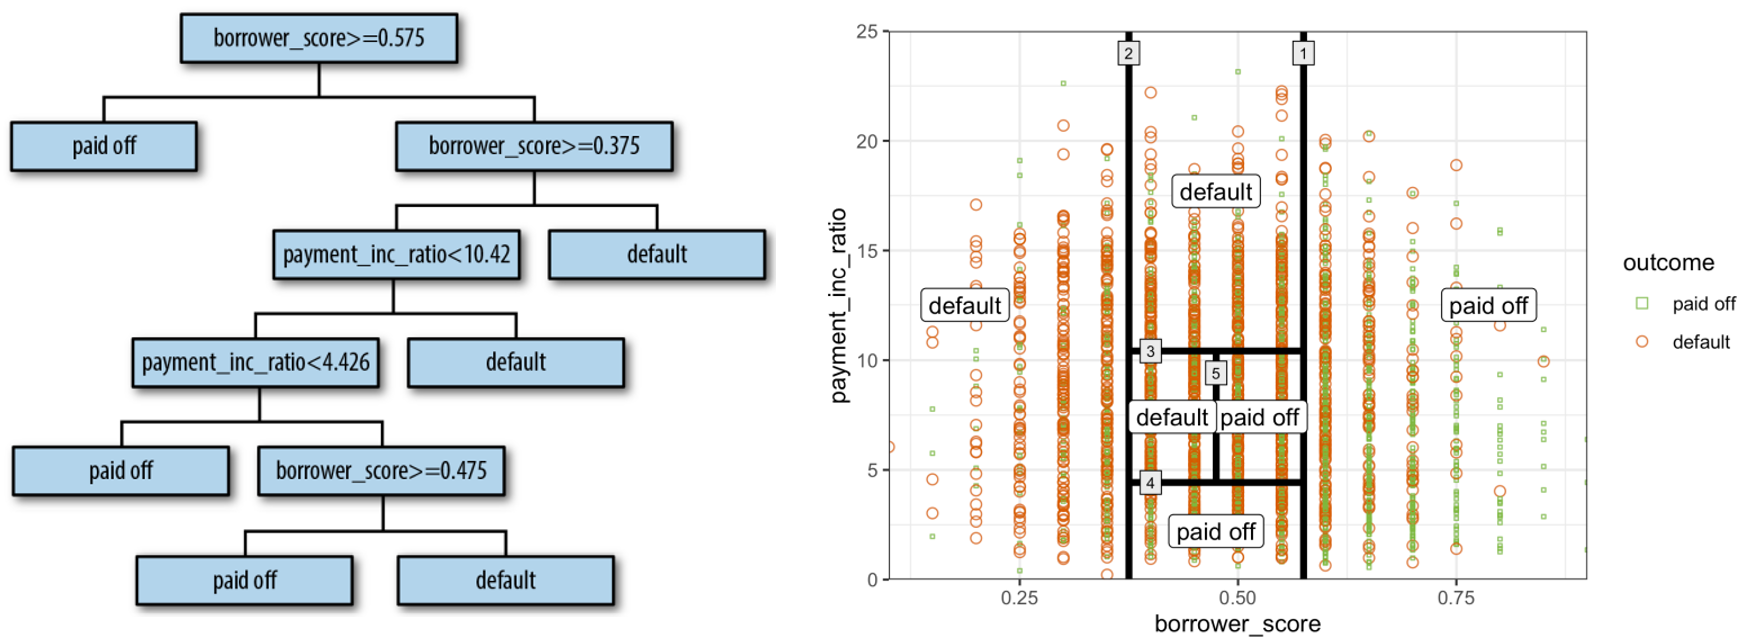

### recursive partitioning algorithm
* decision tree를 형성하기 위한 알고리즘
* straightforward and intuitive
* 변수(predictor)의 값을 기준으로, 비교적으로 높은 순도를 가진 부분(partition)을 나누는 작업


* 한 partition 내 class purity(homogeneity)를 측정하는 방법   
=> 불순도(impurity)를 측정하여 대체   
1) Geni impurity
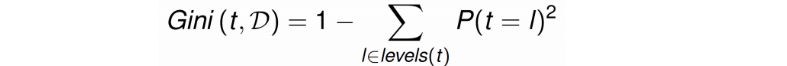
2) entropy
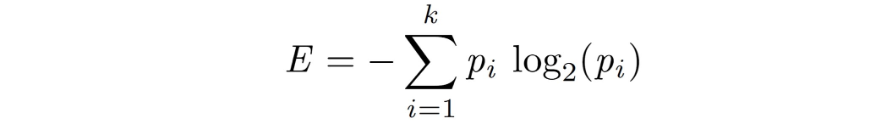

* 불순도가 낮으면서도 크기가 큰 partition을 만들 수 있는 변수 Xi과 split value si를 선택하여 노드를 형성


* 오버피팅을 막기 위해서 트리구조가 너무 깊어지지 않도록 함   
(min_samples_split, min_samples_leaf) 파티션이 너무 작으면 나누지 않음   
(min_impurity_decrease) impurity가 유의하게 낮지 않으면 새로 파티션을 나누지 않음

### regression
* predict continuous value
* impurity: 파티션 내 각 데이터와 파티션 평균의 차이를 이용하여 계산

In [ ]:
# Decision tree classifier, regressor 사용

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [24]:
cart = DecisionTreeClassifier(max_depth = 3).fit(x_train, y_train)

In [25]:
from dmba import textDecisionTree
print(textDecisionTree(cart))

node=0 test node: go to node 1 if 13 <= 0.10261965915560722 else to node 8
  node=1 test node: go to node 2 if 13 <= -0.9389117360115051 else to node 5
    node=2 test node: go to node 3 if 11 <= 1.8119149208068848 else to node 4
      node=3 leaf node: [[0.919, 0.081, 0.0, 0.0]]
      node=4 leaf node: [[0.25, 0.75, 0.0, 0.0]]
    node=5 test node: go to node 6 if 0 <= -0.5372502207756042 else to node 7
      node=6 leaf node: [[0.399, 0.569, 0.032, 0.0]]
      node=7 leaf node: [[0.043, 0.699, 0.257, 0.0]]
  node=8 test node: go to node 9 if 13 <= 0.8200268447399139 else to node 12
    node=9 test node: go to node 10 if 11 <= 0.9227401912212372 else to node 11
      node=10 leaf node: [[0.0, 0.169, 0.746, 0.085]]
      node=11 leaf node: [[0.0, 0.0, 0.544, 0.456]]
    node=12 test node: go to node 13 if 0 <= -0.5440791249275208 else to node 14
      node=13 leaf node: [[0.0, 0.0, 0.383, 0.617]]
      node=14 leaf node: [[0.0, 0.0, 0.06, 0.94]]


In [29]:
print(x_test[0])
print(cart.predict(x_test)[0])
print(cart.predict_proba(x_test)[0])

[ 0.49050173  1.0100505  -1.2530642   0.98117712 -0.76249466 -1.04396559
  0.10768319  0.68754816 -1.61762361 -0.22756439 -1.14080978 -0.89054507
 -0.50571594  1.19394539 -1.25979551 -0.17610693 -1.10039396  0.55964063
  0.99401789 -1.01409939]
3
[0.         0.         0.06020067 0.93979933]


In [31]:
cart.feature_importances_

array([0.05920439, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03979753, 0.        , 0.90099807, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [34]:
cart.score(x_test, y_test)

0.775

In [35]:
cart = DecisionTreeRegressor(max_depth = 3).fit(x_train_m, y_train_m)
print(textDecisionTree(cart))

node=0 test node: go to node 1 if 0 <= 0.13626042008399963 else to node 8
  node=1 test node: go to node 2 if 0 <= -0.9227745831012726 else to node 5
    node=2 test node: go to node 3 if 0 <= -1.4484741687774658 else to node 4
      node=3 leaf node: [[1.0]]
      node=4 leaf node: [[1.0]]
    node=5 test node: go to node 6 if 1 <= 0.24793696403503418 else to node 7
      node=6 leaf node: [[1.0]]
      node=7 leaf node: [[1.0]]
  node=8 test node: go to node 9 if 1 <= 0.1807517632842064 else to node 12
    node=9 test node: go to node 10 if 1 <= -0.8740559220314026 else to node 11
      node=10 leaf node: [[1.0]]
      node=11 leaf node: [[1.0]]
    node=12 test node: go to node 13 if 1 <= 1.1851705312728882 else to node 14
      node=13 leaf node: [[1.0]]
      node=14 leaf node: [[1.0]]


In [37]:
print(x_test_m[0])
print(cart.predict(x_test_m)[0])

[-0.93922105  1.44047431  0.30124855]
11.128421052631577


## Bagging and the Random Forest
* ensemble: 여러개의 모델들의 결과물을 종합하여 최종 결론을 내리는 기법. 일반적으로 단일모델 보다 정확함   
1) 하나의 데이터셋으로 부터 여러개의 predictive model 학습   
2) 여러개의 predictive model의 결과 값들의 평균/weighted average/majority vote 등을 계산하여 최종 결과물로 사용
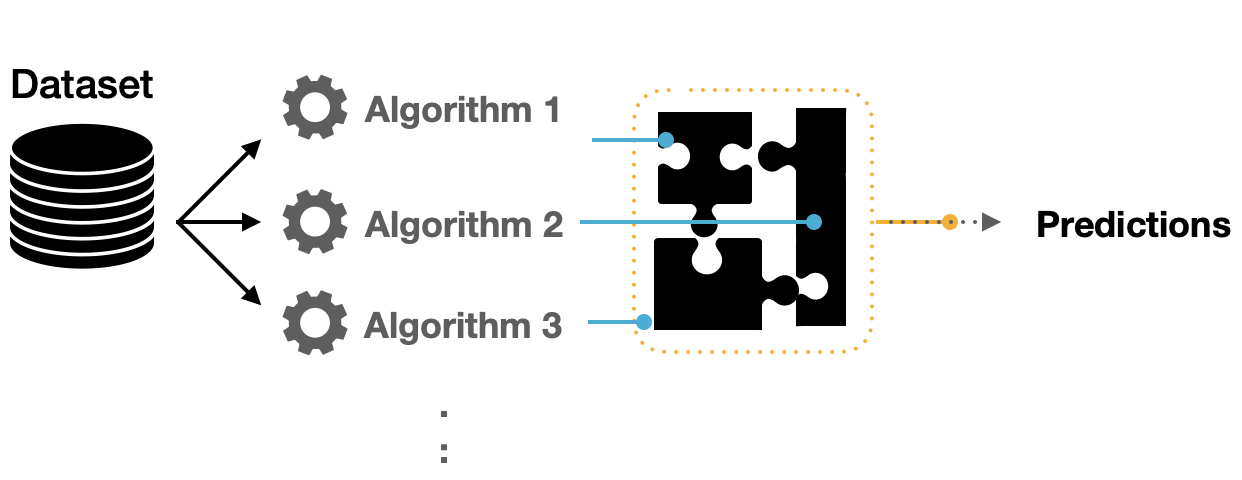

### Bagging
* bootstrap aggregating
* 동일한 데이터셋에서 모델을 학습시키지 않고 / bootstrap resample에 학습시킴   
* 각 predictor의 중요도와 관계가 반영되기 때문에,   
feature와 record가 많은 데이터셋에서 predictive model을 만들 때 도움이 됨   
1) 학습데이터로부터 복원 추출을 수행하여 bootstrap resample 생성(the bag. 이 과정에서 인스턴스가 중복될 수 있음)   
2) 새로만든 학습데이터 bootstrap resample에 모델 학습   
3) 여러개의 predictive model의 결과 값들의 평균/weighted average/majority vote 등을 계산하여 최종 결과물로 사용
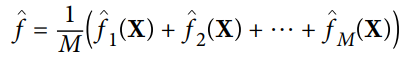
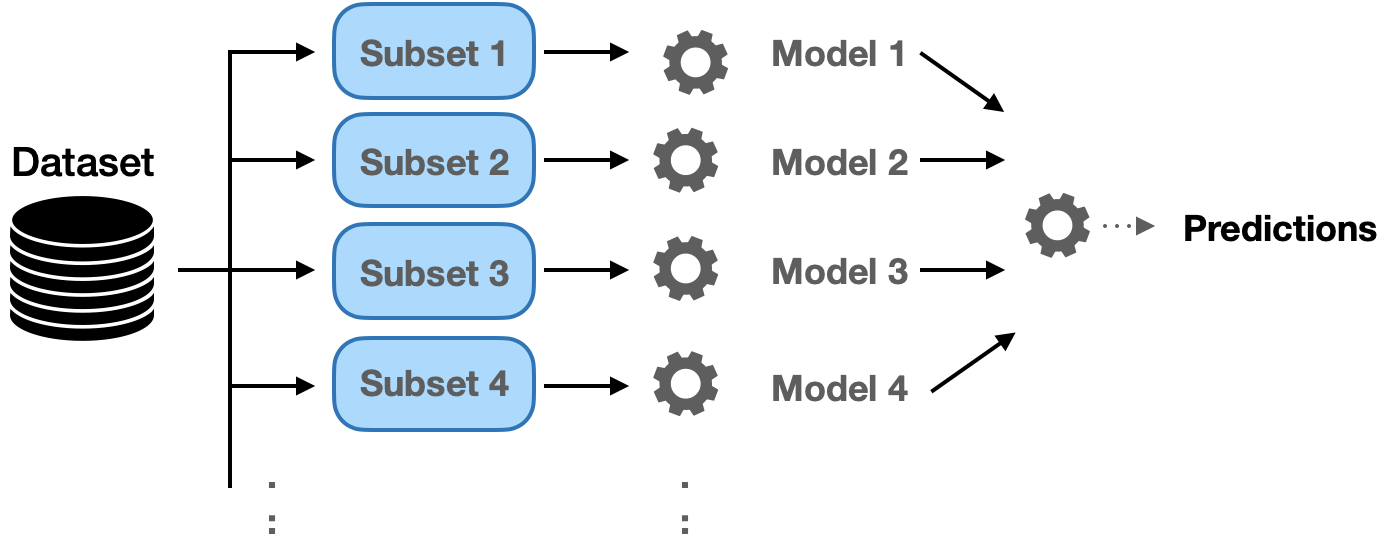
* random forest tree: decision tree + bagging   

In [ ]:
# ensemble, BaggingClassifier, RandomForestClassifier

In [38]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [44]:
# 기본(약한) 학습기 생성
log_model = LogisticRegression()
knn_model = KNeighborsClassifier()
dct_model = DecisionTreeClassifier()

# predict_proba
vote_model = VotingClassifier(
    estimators=[('lr', log_model), ('knn', knn_model), ('dt', dct_model)],
    voting = 'hard' # 'hard', 'soft'
)
vote_model.fit(x_train, y_train)

for model in (log_model, knn_model, dct_model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(model.__class__.__name__,  ':', accuracy_score(y_test, y_pred))
    
y_pred = vote_model.predict(x_test)
print('ensemble: ', accuracy_score(y_test, y_pred))

LogisticRegression : 0.965
KNeighborsClassifier : 0.495
DecisionTreeClassifier : 0.87
ensemble:  0.91


In [ ]:
# Bagging

In [4]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [6]:
bag_model = BaggingClassifier(
    DecisionTreeClassifier(), # 학습기
    n_estimators = 100, # 학습기를 몇개를 만들건지,
    max_samples = 0.7, # 서브샘플 크기(비율),
    bootstrap = True, # bootstrap: True -> Bagging, False -> Pasting
    n_jobs = -1
)

bag_model.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.7,
                  n_estimators=100, n_jobs=-1)

In [7]:
bag_model.score(x_test, y_test)

0.89

In [ ]:
# Random forest classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier

rnd_model = RandomForestClassifier(
    n_estimators = 100,
    max_leaf_nodes = 16,
    n_jobs = -1
)
rnd_model.fit(x_train, y_train)
rnd_model.score(x_test, y_test)

0.835

## Boosting
* 병렬 형태로 모델을 학습/사용했던 Bagging과 달리 직렬 형태를 가짐(연속된 모델)   
1) 데이터에 대해 모델(1) 학습 수행   
2) 모델(1)의 학습 결과를 반영하여 모델(2) 학습   
3) ...   
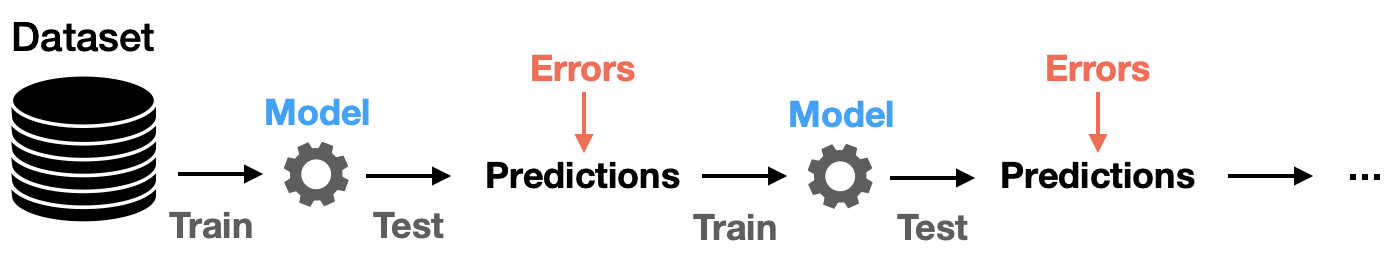


* adaboost: 이전 모델이 분류 실패한 데이터에 대해 가중치를 조정하여 데이터 분포를 변형한 후 모델 학습
* gradient boost: 이전 모델의 residual을 고려하여 residual을 줄여나가는 방향으로 학습(오차 보정)
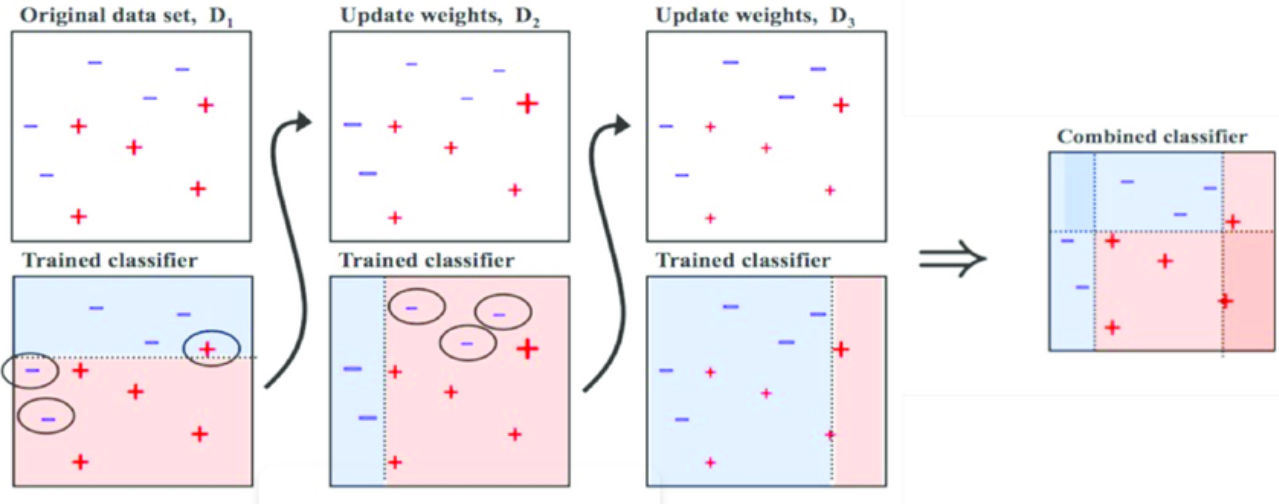

In [ ]:
# adaboost, gradient boost

In [14]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(
    DecisionTreeClassifier(),
    n_estimators = 3,
    learning_rate = 0.5
)
ada.fit(x_train, y_train)
print(ada.score(x_train, y_train))
print(ada.score(x_test, y_test))

1.0
0.875


In [51]:
mobile_price.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [52]:
marketing.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [27]:
marketing = pd.read_csv('Marketing_data.csv')
X_market = marketing[['youtube', 'facebook', 'newspaper']]
y_market = marketing['sales']

X_market = sc.fit_transform(X_market)

x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(X_market, y_market,
                                                            test_size = 0.1, random_state = 0)

In [30]:
from sklearn.tree import DecisionTreeRegressor

tree_1 = DecisionTreeRegressor(max_depth = 3)
tree_1.fit(x_train_m, y_train_m)

residual_1 = y_train_m - tree_1.predict(x_train_m)
tree_2 = DecisionTreeRegressor(max_depth = 3)
tree_2.fit(x_train_m, residual_1)

residual_2 = residual_1 - tree_2.predict(x_train_m)
tree_3 = DecisionTreeRegressor(max_depth = 3)
tree_3.fit(x_train_m, residual_2)

DecisionTreeRegressor(max_depth=3)

In [50]:
pd.DataFrame({'y': y_test_m.values,
             'tree_1': tree_1.predict(x_test_m),
             'tree_2': tree_2.predict(x_test_m),
             'tree_3': tree_3.predict(x_test_m),
             'sum': sum([tree_1.predict(x_test_m), 
                        tree_2.predict(x_test_m),
                        tree_3.predict(x_test_m)])})

,y,tree_1,tree_2,tree_3,sum
0,16.32,11.128421,0.015817,-0.056071,11.088167
1,13.80,14.872941,-1.559042,0.366630,13.680529
2,23.28,23.781818,0.015817,-0.206944,23.590691
3,26.04,28.174286,0.015817,-0.206944,27.983159
4,18.72,18.780000,0.015817,-0.811699,17.984118
5,11.64,11.128421,0.015817,-0.056071,11.088167
6,30.48,28.174286,2.480705,-0.206944,30.448047
7,31.44,28.174286,2.480705,-0.206944,30.448047
8,23.52,23.781818,0.015817,-0.206944,23.590691
9,19.08,18.435000,0.015817,2.424203,20.875019


In [55]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(
    max_depth=3,
    n_estimators=3,
    learning_rate = 0.5
)
gbrt.fit(x_train_m, y_train_m)
gbrt.score(x_test_m, y_test_m)

0.9562253695569267